In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import community
%matplotlib inline

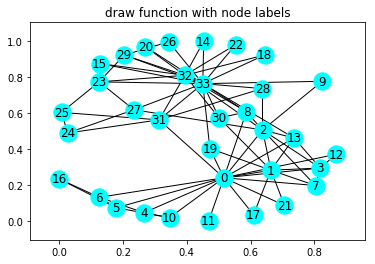

In [43]:
G_k = nx.karate_club_graph()
nx.draw_networkx(G_k,with_labels=True,node_color='cyan')
plt.title("draw function with node labels")
plt.show()

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2}


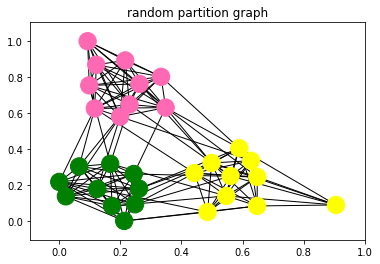

In [66]:
import community
G = nx.random_partition_graph([10,10,10],0.9,0.1)
partition = community.best_partition(G)
print(partition)
colors=['green','hotpink','yellow']
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=pos,c=colors,cmap=matplotlib.colors.ListedColormap(colors), node_color=list(partition.values()))
nx.draw_networkx_edges(G,pos=pos)
plt.title("random partition graph")
plt.show()

# INCIDENCE MATRIX

# decomposing Incidence matrix and plotting node features(W)

In [67]:
inci = nx.incidence_matrix(G).todense()
print(inci.shape)
print(inci)

(30, 154)
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  0. ...,  0.  1.  1.]]


# NMF Decomposition

In [68]:
from sklearn.decomposition import NMF

model = NMF(n_components=2,init='random', random_state=0)
W = model.fit_transform(inci)
H = model.components_
err = model.reconstruction_err_
it = model.n_iter_


In [69]:
print(err)
print(it)
print(W.shape)
print(H.shape)
# print(W[0])
# print(H[:,0])

16.3736251866
89
(30, 2)
(2, 154)


# NMF displaying learned nodes

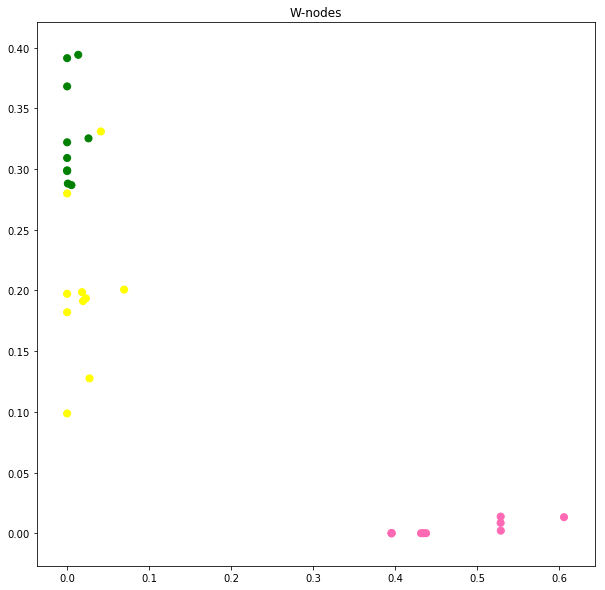

In [70]:
# displaying learned nodes
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow']#, 'cyan','red','purple']
svd = fig.add_subplot(1,1,1)

svd.scatter(W[:, 0], W[:, 1],c=np.array(list(partition.values())),marker='o',s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("W-nodes")
plt.show()

# NMF displaying learned edge vectors(H)

In [71]:
#color edges
edges = G.edges()
ed_label = []
for ed in edges:
    if partition[ed[0]]==partition[ed[1]] and partition[ed[0]]==0:
        ed_label.append(0)
    elif partition[ed[0]]==partition[ed[1]] and partition[ed[0]]==1:
        ed_label.append(1)
    elif partition[ed[0]]==partition[ed[1]] and partition[ed[0]]==2:
        ed_label.append(2)
    elif partition[ed[0]]==0 and partition[ed[1]]==1:
        ed_label.append(3)
    elif partition[ed[0]]==1 and partition[ed[1]]==2:
        ed_label.append(4)
    elif partition[ed[0]]==0 and partition[ed[1]]==2:
        ed_label.append(5)
print(len(edges))
print(len(ed_label))
        
        

154
154


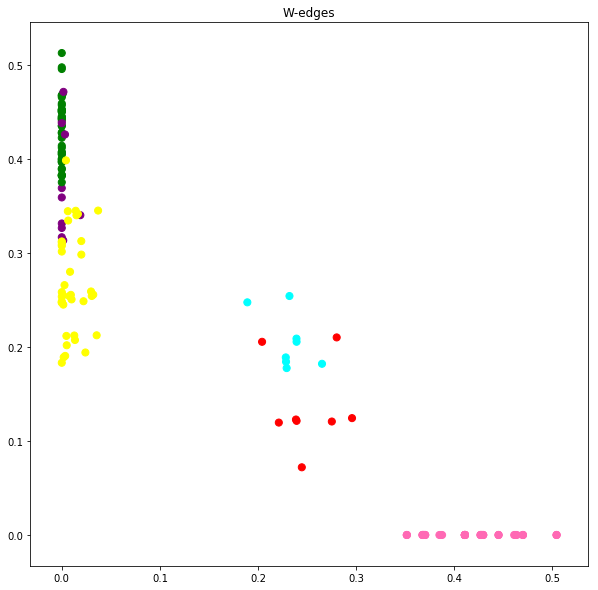

In [72]:
# displaying learned edge vectors(H)
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10,10))
#        0-0      1-1      2-2       0-1    1-2   0-2
colors=['green','hotpink','yellow', 'cyan','red','purple']
svd = fig.add_subplot(1,1,1)
H1 = np.transpose(H)
svd.scatter(H1[:, 0], H1[:, 1],c=np.array(ed_label),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("W-edges")
plt.show()

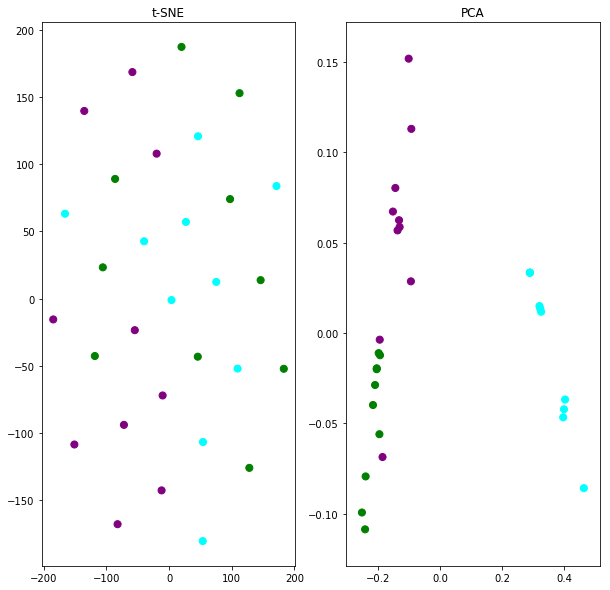

In [73]:
# PCA and t-SNE for node features (W)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow', 'cyan','red','purple']
# W1 = normalize(W)
tsne = fig.add_subplot(1,2,1)
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(W)
tsne.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.array(list(partition.values())),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
tsne.title.set_text("t-SNE")

pca = fig.add_subplot(1,2,2)
X_pca = PCA(n_components=2).fit_transform(W)
pca.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array(list(partition.values())), s=[50, 50], cmap=matplotlib.colors.ListedColormap(colors))
pca.title.set_text("PCA")

plt.show()

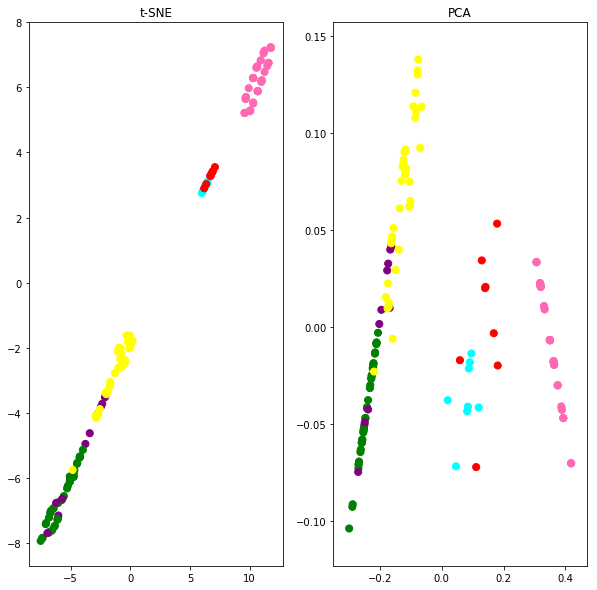

In [77]:
# PCA and t-SNE for edge features (H)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow', 'cyan','red','purple']
H1 = np.transpose(H)
# H1 = normalize(H1)
tsne = fig.add_subplot(1,2,1)
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(H1)
tsne.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.array(ed_label),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
tsne.title.set_text("t-SNE")

pca = fig.add_subplot(1,2,2)
X_pca = PCA(n_components=2).fit_transform(H1)
pca.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array(ed_label), s=[50, 50], cmap=matplotlib.colors.ListedColormap(colors))
pca.title.set_text("PCA")

plt.show()

# SVD decomposition of Incidence matrix

In [78]:
# SVD decomposition
ui,si,vi = np.linalg.svd(inci)

print(ui.shape)
# u=np.around(u,decimals=5)
# print(ui)

print(si.shape)
# s=np.around(s)
# print(si)

print(vi.shape)
# v=np.around(v,decimals=5)
# print(vi)

(30, 30)
(30,)
(154, 154)


# SVD features of nodes decomposed from incidence matrix

30
(30, 1)


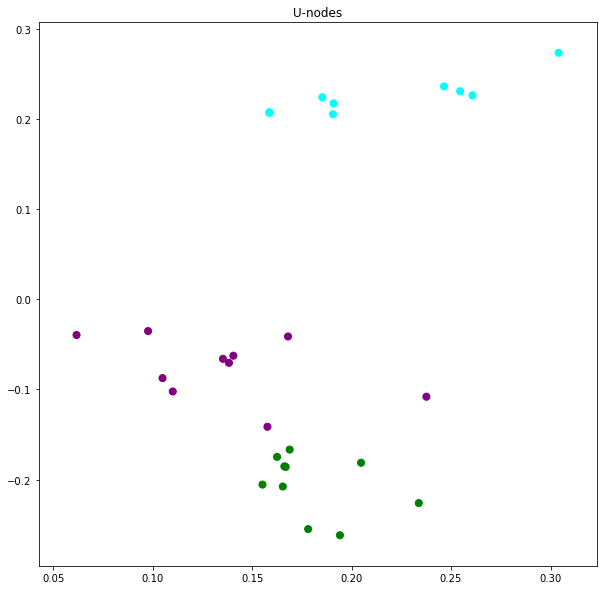

In [79]:
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow', 'cyan','red','purple']
svd = fig.add_subplot(1,1,1)
print(len(list(partition.values())))
print(ui[:,0].shape)
svd.scatter([ui[:, 0]], [ui[:, 1]],c=np.array(list(partition.values())),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("U-nodes")
plt.show()

# SVD features of edges decomposed from incidence matrix

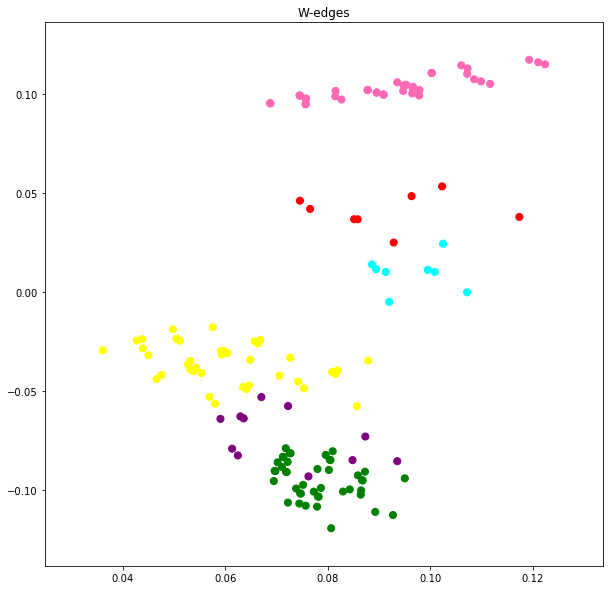

In [80]:
# SVD features of edges decomposed from incidence matrix
fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow', 'cyan','red','purple']
svd = fig.add_subplot(1,1,1)
vi1 = np.transpose(vi)
svd.scatter([vi1[:, 0]], [vi1[:, 1]],c=np.array(ed_label),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("W-edges")
plt.show()

# NORMALIZED GRAPH LAPLACIAN

# Decomposing normalized laplacian and plotting node features(W)

In [81]:
# calculate normalized graph laplacian 
L = nx.normalized_laplacian_matrix(G).todense()
print(L.shape)
print(L[0,0:5])

(30, 30)
[[ 1.         -0.09534626 -0.09090909 -0.09534626 -0.09534626]]


In [57]:
# NMF does not work on input matrix with negative values
# from sklearn.decomposition import NMF

# model = NMF(n_components=2,init='random', random_state=0)
# # decomposing normalized graph laplacian L
# W = model.fit_transform(L)
# H = model.components_
# err = model.reconstruction_err_
# it = model.n_iter_
# print(err)
# print(it)
# print(W.shape)
# print(H.shape)
# print(W[0])
# print(H[:,0])

# SVD decomposition of normalized graph laplacian

In [58]:
# SVD decomposition
ul,sl,vl = np.linalg.svd(L)

print(ul.shape)
# u=np.around(u,decimals=5)
# print(ui)

print(sl.shape)
# s=np.around(s)
# print(si)

print(vl.shape)
# v=np.around(v,decimals=5)
# print(vi)

(30, 30)
(30,)
(30, 30)


# displaying SVD node features(U) of laplacian matrix
### Doing SVD on normalized graph laplacian gives USV^T, where U and V are same, i.e. rows of U are same as clms of V^T. Hence below I displayed node features from U

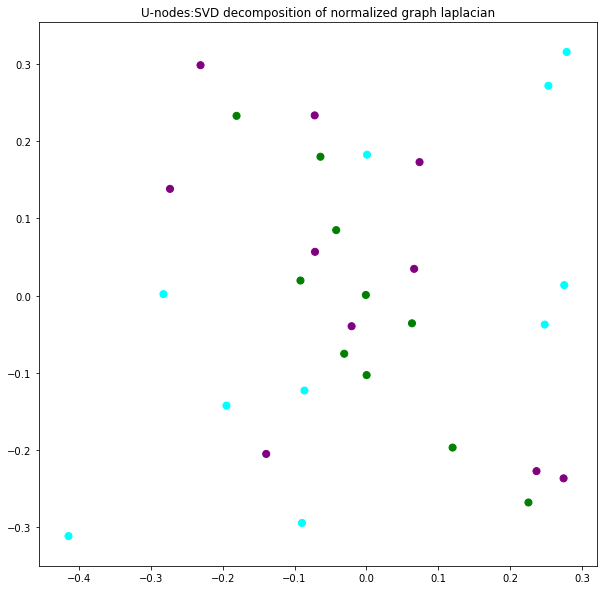

In [59]:
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow', 'cyan','red','purple']
svd = fig.add_subplot(1,1,1)

svd.scatter([ul[:, 0]], [ul[:, 1]],c=np.array(list(partition.values())),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("U-nodes:SVD decomposition of normalized graph laplacian")
plt.show()

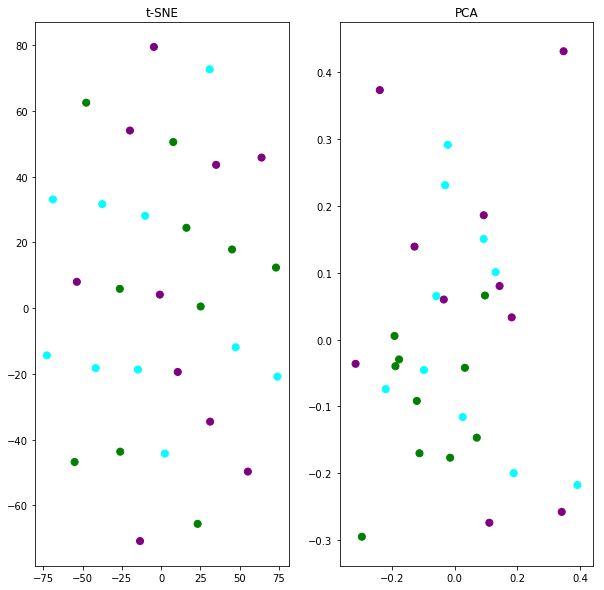

In [60]:
# applying tsne and pca on U-nde features--laplacian matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow',   'cyan',    'red',        'purple']
# normalize
ul1 = normalize(ul)
tsne = fig.add_subplot(1,2,1)
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(ul1)
tsne.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.array(list(partition.values())),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
tsne.title.set_text("t-SNE")

pca = fig.add_subplot(1,2,2)
X_pca = PCA(n_components=2).fit_transform(ul1)
pca.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array(list(partition.values())), s=[50, 50], cmap=matplotlib.colors.ListedColormap(colors))
pca.title.set_text("PCA")

plt.show()

# ADJACENCY MATRIX

# Decomposing Adjacency matrix and displaying node featues

In [61]:
Adj = nx.adjacency_matrix(G)
print(Adj.todense().shape)

# convert adjacency matrix to dense matrix(default format is sparse matrix)
AdjDense = Adj.todense() 

(30, 30)


# NMF decomposition of Adjacency matrix

In [62]:
from sklearn.decomposition import NMF

model = NMF(n_components=2,init='random', random_state=0)
Wa = model.fit_transform(AdjDense)
Ha= model.components_
erra = model.reconstruction_err_
ita = model.n_iter_
print(erra)
print(ita)
print(Wa.shape)
print(Ha.shape)
print(Wa[0])
print(Ha[:,0])

12.1730415662
27
(30, 2)
(2, 30)
[ 0.46313587  0.        ]
[ 0.70797697  0.        ]


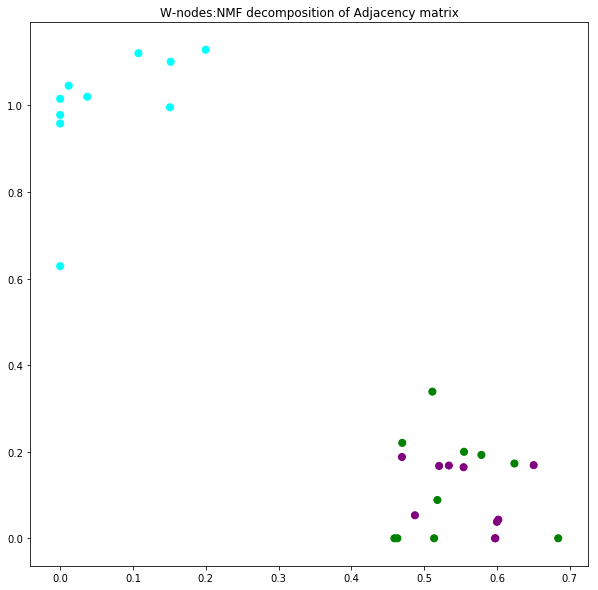

In [63]:
# displaying learned nodes
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow', 'cyan','red','purple']
svd = fig.add_subplot(1,1,1)

svd.scatter([Wa[:, 0]], [Wa[:, 1]],c=np.array(list(partition.values())),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("W-nodes:NMF decomposition of Adjacency matrix")
plt.show()

# SVD Decomposition of adjacency matrix

In [64]:
# Calculate SVD (Singular value decomposition) of graph's adjacency matrix
ua,sa,va = np.linalg.svd(AdjDense)

print(ua.shape)
# u=np.around(u,decimals=3)
# print(u)

print(sa.shape)
# s=np.around(s)
# print(s)

print(va.shape)
# v=np.around(v,decimals=3)
# print(v)

(30, 30)
(30,)
(30, 30)


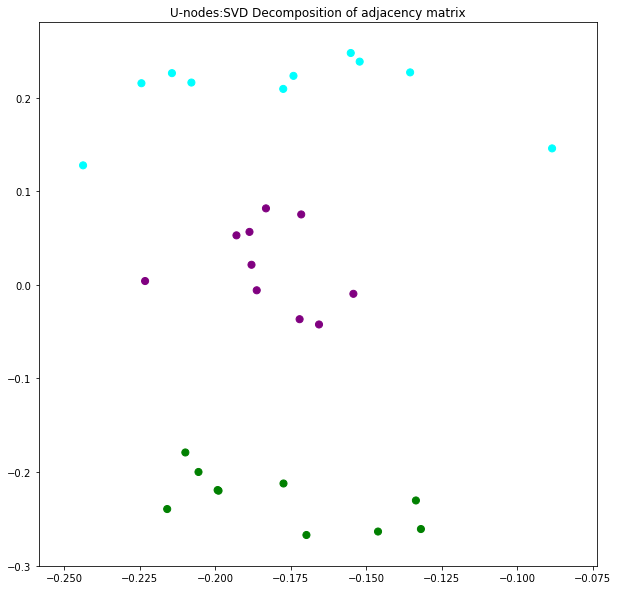

In [65]:
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10,10))
colors=['green','hotpink','yellow', 'cyan','red','purple']
svd = fig.add_subplot(1,1,1)

svd.scatter([ua[:, 0]], [ua[:, 1]],c=np.array(list(partition.values())),s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("U-nodes:SVD Decomposition of adjacency matrix")
plt.show()

# CONCLUSION
### Learned node/edge features are highly dependent on which matrix factorization method is used

*1) Non-negative matrix factorization(NMF):*

  - (why to use this:)Decomposes matrix X = W^T.H using alternating minimization algorithm. We can use Inductive matrix completion technique [Natarajan and Dhillon 2014](https://academic.oup.com/bioinformatics/article/30/12/i60/385272) to incorporate extra infor(like node features and edge features) while decomposing.
    
  - (disadv:)Works only on matrix with non-negative entries.

*2) Singular value decomposition(SVD):*

  - (Why use this:)popular method. Decomposes matrix into 3 matrices.
    
  - (disadv:) Is it possible add extra infor while decomposing(something similar to NMF)
    
## OBSERVATION:

### Incidence matrix gives good separable node features as well as edge features

  - NMF is allowed on Incidence matrix.
    
  - Decomposed W matrix contains features of rows of incidence matrix which are nothing but the nodes of graph.
    
  - Scatter plot of both decompositions NMF and SVD, are nicely separable. However, representations of SVD are better.(This may be because, number of components used in NMF is 2, which leads to very high reconstruction error. perhaps, increasing it may help get better featuresusing NMF.)
    
  - ADV: along with good features, we are getting features for edges as well (which indicate reationship between nodes).
  - As NMF can be applied, we can make use of extra information while decomposition as per Inductive matrix completion [Natarajan and Dhillon 2014](https://academic.oup.com/bioinformatics/article/30/12/i60/385272)

    
### Normalized Graph Laplacian does not give good features for nodes

  - NMF does not work for this matrix
    
  - SVD works but does not give good features. Even after doing PCA and TSNE, the node features are not forming clusters according to communitites.
    
  - We get only node features.

### Adjacency matrix gives only good node features

  - NMF is allowed and gives good result but SVD gives better representation.
    
  - Gives only node features.
